TASK-10A: Please model the AD dataset using the SVM, Decision Tree, and Random Forest algorithms.

>Please apply train test split (%75-%25),
Then grid search (hyperparameter tuning),
Then classification report and confusion matrix (on the test dataset),
Then compare the findings from the three algorithms


Verimizi Çekiyoruz;

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("Temporary_data3_Left_Right_Copy.xlsx", index_col=0)
y_data = data["CDRGLOB"]
data.drop(columns = ["CDRGLOB"], axis = 1, inplace = True)

Önce Verimizi traine %75, teste %25 şeklinde ayırıyoruz.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,train_size=0.75,stratify=y_data)

Ardından Sırasıyla SVM(Support Vector Machines),Decision Tree ve Random Forest ile çalışıyoruz.

1)SVM(Support Vector Machines) Classifier:

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
model1=SVC()

In [37]:
param_grid1 = {"C": np.linspace(2.0,5.0, num = 4),
              'kernel':['poly', 'rbf', 'sigmoid'],
              'shrinking':[True,False],
              "degree": [3,4,5]}
grid1 = GridSearchCV(model1, param_grid1,cv=3)

In [38]:
grid1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': array([2., 3., 4., 5.]), 'degree': [3, 4, 5],
                         'kernel': ['poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]})

In [39]:
grid1.best_params_

{'C': 5.0, 'degree': 3, 'kernel': 'poly', 'shrinking': True}

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model1 = grid1.best_estimator_
y2_pred = model1.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model1, X_train, y_train)
score.mean()

0.548768472906404

In [41]:
accuracy_score(y_test, y2_pred)

0.5575221238938053

Text(80.90000000000006, 0.5, 'true value')

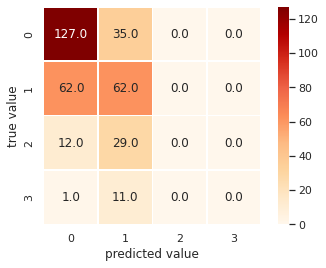

In [42]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')


In [43]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y2_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.63      0.78      0.70       162
     class 1       0.45      0.50      0.48       124
     class 2       0.00      0.00      0.00        41
     class 3       0.00      0.00      0.00        12

    accuracy                           0.56       339
   macro avg       0.27      0.32      0.29       339
weighted avg       0.47      0.56      0.51       339



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2)Random Forest Classifier:

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

model2=RandomForestClassifier()
param_grid2 = {'n_estimators':[100,110,120,130],
              'criterion':['gini', 'entropy', 'log_loss'],
              'min_samples_split':[2,3,4],
              'max_features':['sqrt', 'log2']}
grid2 = GridSearchCV(model2, param_grid2, cv=3)

In [45]:
grid2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 110, 120, 130]})

In [46]:
grid2.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 120}

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() 
from sklearn.metrics import accuracy_score
model2 = grid2.best_estimator_
y2_pred2 = model2.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model2, X_train, y_train, cv=3)
score.mean()

0.6945564457477325

In [48]:
accuracy_score(y_test, y2_pred2)

0.6814159292035398

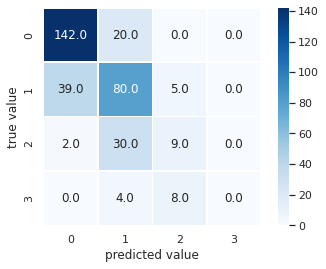

In [49]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred2)
sns.heatmap(mat, square=True, annot=True,cmap=plt.cm.Blues, cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [50]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y2_pred2, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.78      0.88      0.82       162
     class 1       0.60      0.65      0.62       124
     class 2       0.41      0.22      0.29        41
     class 3       0.00      0.00      0.00        12

    accuracy                           0.68       339
   macro avg       0.45      0.44      0.43       339
weighted avg       0.64      0.68      0.65       339



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3)Decision Tree Classifier:

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

model3=DecisionTreeClassifier()
param_grid3 = {'criterion':['gini', 'entropy', 'log_loss'],
               'splitter':['best','random'],
               'min_samples_split':[2,3,4,5],
               'min_samples_leaf':[1,2,3,5],
              'max_features':['auto','sqrt', 'log2']}
grid3 = GridSearchCV(model3, param_grid3, cv=3)

In [60]:
grid3.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
288 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_m

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [61]:
grid3.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'random'}

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model3 = grid3.best_estimator_
y2_pred3 = model3.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model3, X_train, y_train, cv=3)
score.mean()

0.5881784806223199

In [63]:
accuracy_score(y_test, y2_pred3)

0.5870206489675516

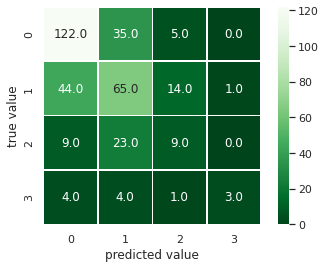

In [64]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred3)
sns.heatmap(mat, square=True, annot=True, cmap = "Greens_r",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [65]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y2_pred3, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.68      0.75      0.72       162
     class 1       0.51      0.52      0.52       124
     class 2       0.31      0.22      0.26        41
     class 3       0.75      0.25      0.38        12

    accuracy                           0.59       339
   macro avg       0.56      0.44      0.47       339
weighted avg       0.58      0.59      0.58       339



Kısaca yorum yapmak gerekirse accuracy olarak 3 model içerisinde random forest en yüksek score'a sahip olmanın yanında Class-0 ve Class-1 için en yüksek precision, recall ve f1-score değerlerine yine Random Forest Classifier sahipken SVC ve Random Forest Classifier'ın confusion matrix'lerine bekıldığında ve Class-2 ile Class-3 precision,recall,f1-score değerlerine bakıldığında görülecektirki herhangi bir doğru tahmin bu sınıflar için sağlanamamıştır. Ancak Decision Tree'de bu böyle değildir. Decision Tree Classifierda her ne kadar RFC(Random Forest Classifier)'dan daha düşük accuracy ve Class-0, Class-1 ile Class-2 için precision değerlerine sahip olsada Class-3 için predictiondan'da bulunmuştur. Ancak unutulmamalıdır ki Class-3 verisi diğer class verilerine nazaran azınlıkta kalmaktadır. Bu gerçek RFC'nin Class-3 tahmininin doğru yapamaması hatasını diğer yönlerden üstünlüğü ile örtmesine neden olabilecektir.